#<b>Milestone 2

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


###<b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical  # Added by SB
from tensorflow.keras.metrics import Recall # Added by SB

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

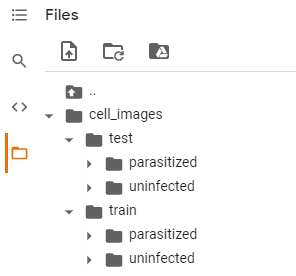

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images_nd = (train_images/255.0).astype('float32')

test_images_nd = (test_images/255.0).astype('float32')

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

###<B>One Hot Encoding on the train and test labels

In [ ]:
from tensorflow.python.ops.math_ops import tensor_not_equals
# Encoding Train Labels
train_labels_en = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels_en = to_categorical(test_labels, 2)


### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images_nd, train_labels_en, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 14s 9ms/step - loss: 0.3914 - accuracy: 0.8151 - recall: 0.8151 - val_loss: 0.1533 - val_accuracy: 0.9675 - val_recall: 0.9675
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.1229 - accuracy: 0.9577 - recall: 0.9577 - val_loss: 0.1488 - val_accuracy: 0.9744 - val_recall: 0.9744
Epoch 3/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0909 - accuracy: 0.9698 - recall: 0.9698 - val_loss: 0.0960 - val_accuracy: 0.9824 - val_recall: 0.9824
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0809 - accuracy: 0.9726 - recall: 0.9726 - val_loss: 0.0743 - val_accuracy: 0.9854 - val_recall: 0.9854
Epoch 5/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0779 - accuracy: 0.9733 - recall: 0.9733 - val_loss: 0.0685 - val_accuracy: 0.9842 - val_recall: 0.9842
Epoch 6/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0694 - accuracy: 0.9766

###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images_nd, test_labels_en, verbose = 1)
print (accuracy)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0597 - accuracy: 0.9846 - recall: 0.9846
[0.059656091034412384, 0.9846153855323792, 0.9846153855323792]

 Test_Accuracy:- 0.9846153855323792


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



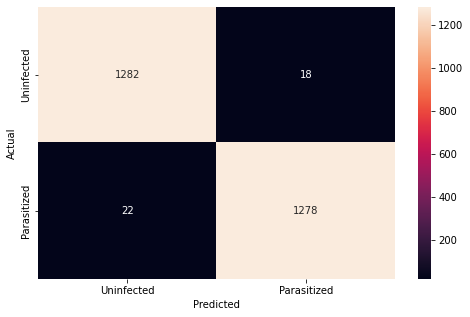

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images_nd)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels_en, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

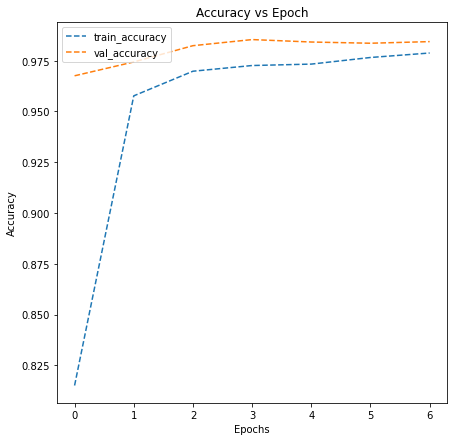

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing the backend for new model
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()

# Build the model here and add new layers
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))


model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.4))

model1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", ))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", ))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))


model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images_nd, train_labels_en, batch_size = 32, callbacks = callbacks,  validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 9ms/step - loss: 0.3105 - accuracy: 0.8491 - recall: 0.8491 - val_loss: 0.0510 - val_accuracy: 0.9924 - val_recall: 0.9924
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0963 - accuracy: 0.9671 - recall: 0.9671 - val_loss: 0.0418 - val_accuracy: 0.9888 - val_recall: 0.9888
Epoch 3/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0868 - accuracy: 0.9711 - recall: 0.9711 - val_loss: 0.0537 - val_accuracy: 0.9802 - val_recall: 0.9802
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0818 - accuracy: 0.9735 - recall: 0.9735 - val_loss: 0.0841 - val_accuracy: 0.9720 - val_recall: 0.9720


###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images_nd,test_labels_en, verbose = 1)
print (accuracy1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 1s 6ms/step - loss: 0.0658 - accuracy: 0.9815 - recall: 0.9815
[0.06579706817865372, 0.9815384745597839, 0.9815384745597839]

 Test_Accuracy:- 0.9815384745597839


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



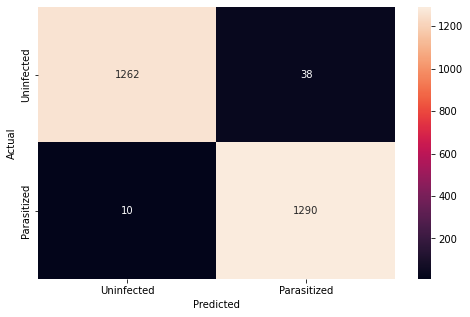

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images_nd)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels_en, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

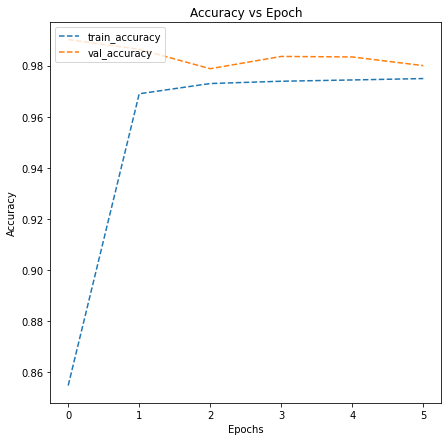

In [ ]:
plot_accuracy(history1)

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?

Leaky ReLU can improve the performance as it has two benefits: It fixes the “dying ReLU” problem, as it doesn't have zero-slope parts and it speeds up training. 
*  Can BatchNormalization improve our model?

BatchNormalization can help as it performs in batches and also helps in reducing overfitting. 

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the Model

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(BatchNormalization())

model2.add(Conv2D(filters = 32, kernel_size = 3, padding = "same"))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(BatchNormalization())

model2.add(Conv2D(filters = 32, kernel_size = 3, padding = "same"))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(BatchNormalization())

model2.add(Conv2D(filters = 64, kernel_size = 3, padding = "same"))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(BatchNormalization())


model2.add(Conv2D(filters = 64, kernel_size = 3, padding = "same"))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(BatchNormalization())



model2.add(Flatten())

model2.add(Dense(512))
model2.add(LeakyReLU(0.1))
model2.add(Dropout(0.4))
model2.add(BatchNormalization())


model2.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

adam = optimizers.Adam(learning_rate = 0.001) # changes it from 0.001 to 0.005

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy', Recall()])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images_nd, train_labels_en, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 10ms/step - loss: 0.1817 - accuracy: 0.9308 - recall: 0.9308 - val_loss: 0.0185 - val_accuracy: 0.9944 - val_recall: 0.9944
Epoch 2/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0797 - accuracy: 0.9734 - recall: 0.9734 - val_loss: 0.0187 - val_accuracy: 0.9940 - val_recall: 0.9940
Epoch 3/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0718 - accuracy: 0.9766 - recall: 0.9766 - val_loss: 0.0771 - val_accuracy: 0.9840 - val_recall: 0.9840


<b>Plotting the train and validation accuracy

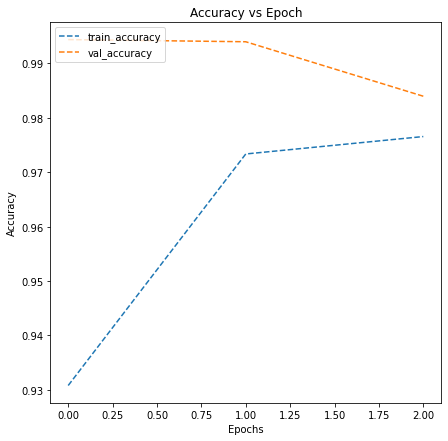

In [ ]:
# Plotting the accuracies
plot_accuracy(history2)

###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy = model2.evaluate(test_images_nd,test_labels_en, verbose = 1)
print (accuracy)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0578 - accuracy: 0.9846 - recall: 0.9846
[0.057803403586149216, 0.9846153855323792, 0.9846153855323792]

 Test_Accuracy:- 0.9846153855323792


####<b>Observations and insights: ____
This model has train accuracy (97.6%) and  validation accuracy (98.4%). Test accuracy is also very very good (with 98.69%). 
The model is not overfitting but rather validation accuracy is higher than training accuracy.  

Advantages of this technique:
• LeakyRelu fixes the “dying ReLU” problem, as it doesn't have zero
slope parts and it speeds up training.
• Batch Normalization performs in batches and helps in reducing overfitting.

<b> Generate the classification report and confusion matrix 

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



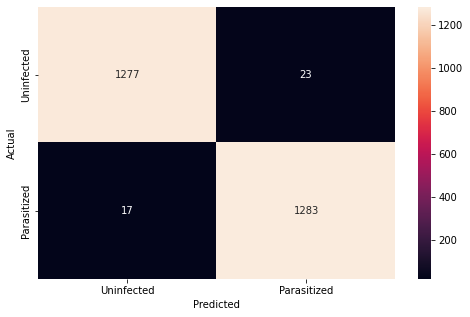

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images_nd)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels_en, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
CNN needs good amount of iamages for a modet to perform well. As we have a small dataset, around 25K images, data augmentation should be performed to see making dataset bigger helps. 
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images_nd, train_labels_en, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.

Added a new model, Model 5 with different parameters and that didnt help with improving the accuracy significantly. 



####<B>Visualizing Augmented images

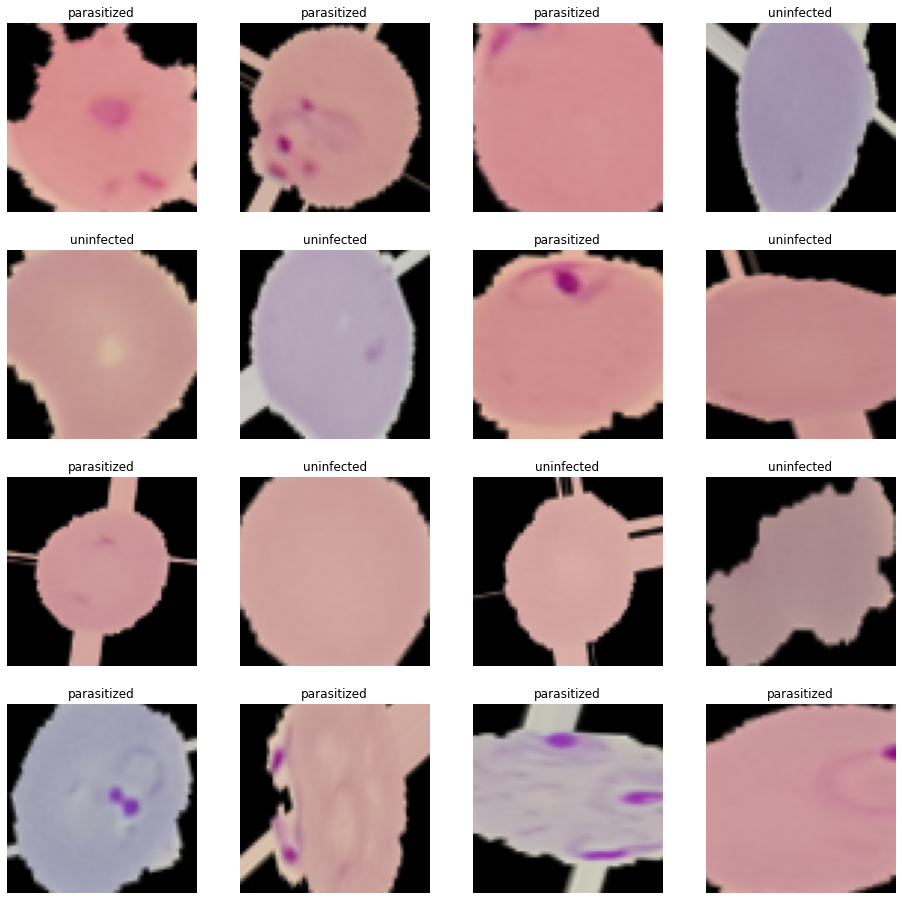

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: ____

 Data augmentation is used in situations where collecting large amounts of data is difficult. 
Healthcare is one of the industries leveraging this method. As this is related to medical 
problem, using data augmentation can help to increase the number of images in the 
dataset. 

We can see that the images are rotated and zoomed. The main aspect of these images is the dark pink stain present in the parasitized blood cells , that disinguishes the affected (parasitized cells) from the unaffected ones. And we can still those stains in the images so thats good but we need to be careful with the amount we zoom in these images. 

###<b>Building the Model

In [ ]:
model3 = Sequential()

# Build the model here
# Use this as the optimizer

model3.add(Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512, activation = "relu"))
model3.add(BatchNormalization())
#model3.add(Dropout(0.4))

model3.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy', Recall()])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 32s 74ms/step - loss: 0.3643 - accuracy: 0.8285 - recall: 0.8285 - val_loss: 0.3669 - val_accuracy: 0.9445 - val_recall: 0.9445
Epoch 2/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1690 - accuracy: 0.9422 - recall: 0.9422 - val_loss: 0.0954 - val_accuracy: 0.9758 - val_recall: 0.9758
Epoch 3/20
312/312 [==============================] - 22s 71ms/step - loss: 0.1544 - accuracy: 0.9490 - recall: 0.9490 - val_loss: 0.0721 - val_accuracy: 0.9776 - val_recall: 0.9776
Epoch 4/20
312/312 [==============================] - 23s 75ms/step - loss: 0.1483 - accuracy: 0.9501 - recall: 0.9501 - val_loss: 0.0849 - val_accuracy: 0.9722 - val_recall: 0.9722
Epoch 5/20
312/312 [==============================] - 22s 70ms/step - loss: 0.1465 - accuracy: 0.9516 - recall: 0.9516 - val_loss: 0.0944 - val_accuracy: 0.9748 - val_recall: 0.9748


###<B>Evaluating the model

<b>Plot the train and validation accuracy

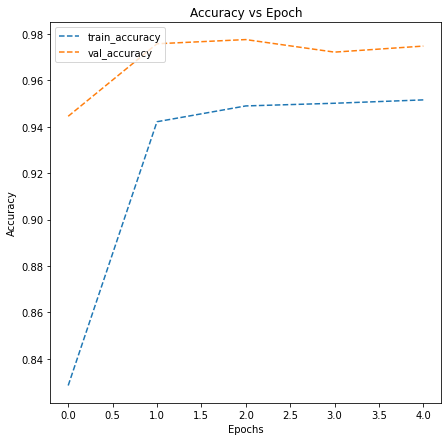

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images_nd, test_labels_en, verbose = 1)
print(accuracy3)
print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 1s 6ms/step - loss: 0.0797 - accuracy: 0.9769 - recall: 0.9769
[0.07973315566778183, 0.9769230484962463, 0.9769230484962463]

 Test_Accuracy:- 0.9769230484962463


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1300
           1       0.98      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



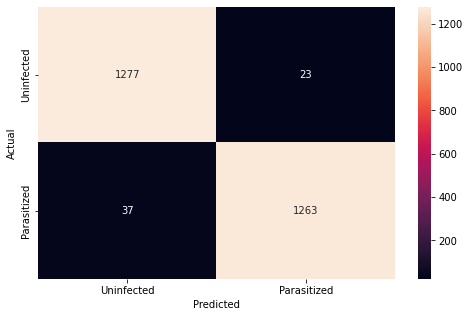

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images_nd)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels_en, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
transfer_layer = vgg.get_layer('block5_pool') # Given in the notebook



vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model.Correction as per the notebook it said 3rd block  but it should be 5th block as get_layer is = block5_pool

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [ ]:
# Compiling the model 
adam = optimizers.Adam(learning_rate = 0.001)

model4.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy', Recall()])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            train_images_nd, train_labels_en,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
624/624 [==============================] - 13s 17ms/step - loss: 0.2830 - accuracy: 0.8790 - recall: 0.8790 - val_loss: 0.1910 - val_accuracy: 0.9245 - val_recall: 0.9245
Epoch 2/10
624/624 [==============================] - 10s 16ms/step - loss: 0.1560 - accuracy: 0.9416 - recall: 0.9416 - val_loss: 0.8609 - val_accuracy: 0.5709 - val_recall: 0.5709
Epoch 3/10
624/624 [==============================] - 10s 16ms/step - loss: 0.1239 - accuracy: 0.9552 - recall: 0.9552 - val_loss: 0.2203 - val_accuracy: 0.9097 - val_recall: 0.9097


<b>Plot the train and validation accuracy

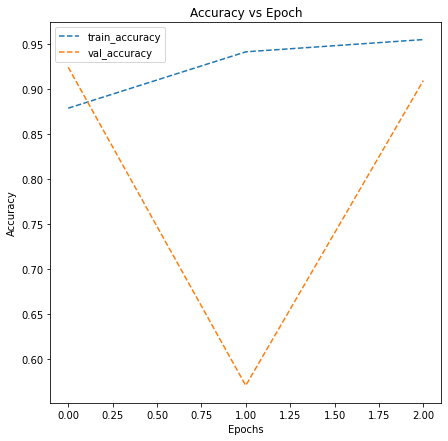

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

Here we can see the accuracy plot looks very different as compared to the accuracy plots of the other models. Validation accuracy started at 92%, dropped to 57% and then gained back accuracy around 91%. Training accracy is around 95%. In this model is overfitting. There is potential to further improve this model. Few things that could be tried here:
1. The vgg model has been trained on image size as 224 * 224 but the images in our dataset is 64*64. So it we probably need to resize these images to 224*224 and then use it in the model. 
2. The imahes have used MinMaxscalar but the vgg model has used Standardscalar for training. The images of our dataset should be normalized using standard scalr before using in the VGG model. 

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images_nd, test_labels_en, verbose = 1)
print(accuracy4)

print('\n', 'Test_Accuracy:-', accuracy4[1])


82/82 [==============================] - 1s 15ms/step - loss: 0.1640 - accuracy: 0.9315 - recall: 0.9315
[0.16397543251514435, 0.931538462638855, 0.931538462638855]

 Test_Accuracy:- 0.931538462638855


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1300
           1       0.89      0.99      0.94      1300

    accuracy                           0.93      2600
   macro avg       0.94      0.93      0.93      2600
weighted avg       0.94      0.93      0.93      2600



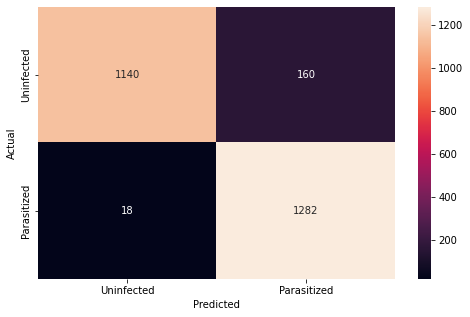

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images_nd)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels_en, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?

Overall accuracy is 93 ad F1-score is 93-94 , which is much less than the other models. And that could be becuase of the points mentioned above in the Observations. Recall score of parasitized is pretty good as its 99% , but its unacceptably low  for the uninfected group as it is only 88%. 

*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


**Model 5 - Data augmentation with different Image data generator parameters. **

In [ ]:
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images_nd, train_labels_en, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.1, rotation_range = 50)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

In [ ]:
model5 = Sequential()

# Build the model here
# Use this as the optimizer

model5.add(Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
#model5.add(LeakyReLU(0.1))
model5.add(MaxPooling2D(pool_size = 2))
model5.add(Dropout(0.2))

model5.add(Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"))
# model5.add(LeakyReLU(0.1))
model5.add(MaxPooling2D(pool_size = 2))
model5.add(Dropout(0.2))

model5.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))
# model5.add(LeakyReLU(0.1))
model5.add(MaxPooling2D(pool_size = 2))
model5.add(BatchNormalization())
#model5.add(Dropout(0.2))

model5.add(Flatten())

model5.add(Dense(512, activation = "relu"))
# model5.add(LeakyReLU(0.1))
model5.add(BatchNormalization())
#model5.add(Dropout(0.4))

model5.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

adam = optimizers.Adam(learning_rate = 0.001)

model5.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy', Recall()])

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history5 = model5.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 26s 80ms/step - loss: 0.5689 - accuracy: 0.7205 - recall: 0.7205 - val_loss: 1.0451 - val_accuracy: 0.5381 - val_recall: 0.5381
Epoch 2/20
312/312 [==============================] - 24s 78ms/step - loss: 0.1458 - accuracy: 0.9507 - recall: 0.9507 - val_loss: 0.1149 - val_accuracy: 0.9591 - val_recall: 0.9591
Epoch 3/20
312/312 [==============================] - 25s 79ms/step - loss: 0.1172 - accuracy: 0.9600 - recall: 0.9600 - val_loss: 0.2499 - val_accuracy: 0.9377 - val_recall: 0.9377
Epoch 4/20
312/312 [==============================] - 24s 78ms/step - loss: 0.1085 - accuracy: 0.9632 - recall: 0.9632 - val_loss: 0.1110 - val_accuracy: 0.9663 - val_recall: 0.9663
Epoch 5/20
312/312 [==============================] - 24s 77ms/step - loss: 0.0978 - accuracy: 0.9681 - recall: 0.9681 - val_loss: 0.1815 - val_accuracy: 0.9559 - val_recall: 0.9559
Epoch 6/20
312/312 [==============================] - 24s 77ms/step - loss: 0.0855 - accur

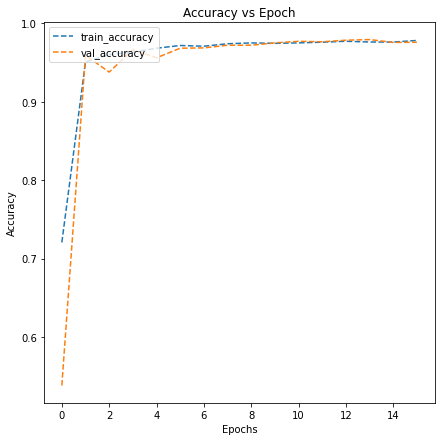

In [ ]:
# Potting the accuracies
plot_accuracy(history5)

In [ ]:
# Evaluating the model on test data
accuracy5 = model5.evaluate(test_images_nd, test_labels_en, verbose = 1)
print(accuracy5)
print('\n', 'Test_Accuracy:-', accuracy5[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0657 - accuracy: 0.9808 - recall: 0.9808
[0.06565461307764053, 0.9807692170143127, 0.9807692170143127]

 Test_Accuracy:- 0.9807692170143127


82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



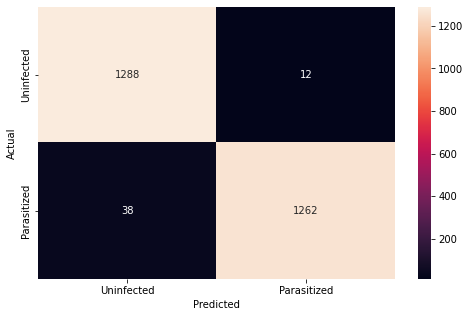

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model5.predict(test_images_nd)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels_en, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

Choose the model with the best accuracy scores from all the above models and save it as a final model.

Saving the Best Model

In [ ]:
import pickle 

with open("final_model", "wb") as file:

    pickle.dump(model2, file)


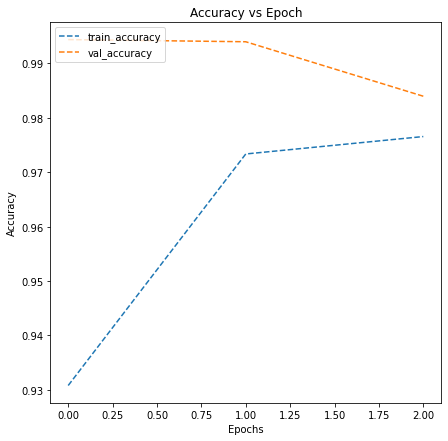

In [ ]:
file_name_history = 'final_model_history'
pickle.dump(history2, open(file_name_history,'wb'))
loaded_model_history = pickle.load(open(file_name_history,'rb'))
plot_accuracy(loaded_model_history)

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



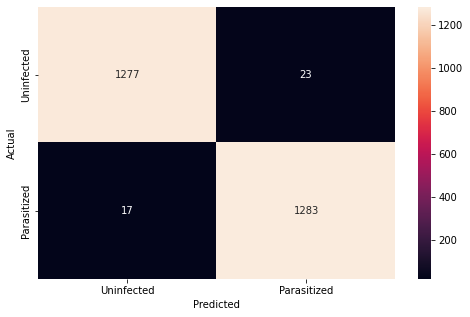

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred_final = model2.predict(test_images_nd)

pred_final = np.argmax(pred_final, axis = 1) 

y_true_final = np.argmax(test_labels_en, axis = 1)

# Printing the classification report
print(classification_report(y_true_final, pred_final))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true_final, pred_final)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

####<b> Observations and Conclusions drawn from the final model: _____

This model has 98% accuracy and recall. As per the accuracy plot below, validation accuracy is still higher than the training accuracy. As shown in the Confusion matrix of the Model 2, there are only 17 malaria cases that were not 
diagnosed and only 23 that were misdiagnosed as Malaria. Overall, its a very good model. 

**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?

Pre-trained  model did not perform very well on the images from the dataset but there is potential to  improve this model by trying the following: 

1.	The VGG16 model has been trained on image size as 224 * 224 but the image in our dataset is 64*64. So, need to resize these images to 224* 224 and then use it in the model.

2.	The images have used Minmax scalar but the VGG16 model has used Standard scalar for training. The images of our dataset should be normalized using standard scalar before using in the VGG model.

*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

The data in the dataset consists of images of blood cells.  The cells have different shapes and colour. But what we are looking for in the image, is the presence of dark pink color stain in the blood cell. As seen in figure 1 below, based on the presence or the absence of this stain, the blood cells can be classified as:  

•	Parasitized (Label 1): The parasitized cells contain the Plasmodium parasite which causes malaria. These images can be found by presence of one or more dark pink color stain in the blood cells. If the stain is present in the blood cell in the image it contains the Plasmodium parasite which causes malaria. 

•	Uninfected (Label 0): These images do not have dark pink color stain in the blood cells. And hence these are uninfected cells and are free of the Plasmodium parasites. 



####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Please refer to the report for the details. 
Model 2 with Batch Normalization and LeakyReLU is performing relatively better. 




####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

Out of all the 5 Models listed in the comparison table above, Model 2 is the model that is giving relatively better performance and so Model 2 is the best and the proposed model proposed for the below explained reason. 

All the models except Model 4 have accuracy as 98%. 

•	Since there are 4 Models with the same accuracy, this problem being a medical image classification, Recall (for label parasitized) is the next metric we should use. This is important as the False negatives need to be as low as possible so positive Malaria cases do not undiagnosed and untreated. Out of all the models that have accuracy as 98%, there are two models  that have Recall (for label parasitized) as 99%. (Model 1 and Model 2).

•	Both the models- Model 1 and Model 2 have equal accuracy and equal Recall (for label parasitized). In that case, the model with the greater Recall for label uninfected should be selected. Although, minimizing False Negatives is the most important factor, but we also need to minimize False positives. If more uninfected people are incorrectly diagnosed with Malaria, patients may face side effects from the unrequired drugs. And in addition, it can also lead to wastage of time, money, and resources to treat the people that are not even infected in the first place. 

•	Considering all the stated factors in mind, Model 2 is the proposed model. 
As shown in the Confusion matrix of the Model 2, there are only 17 malaria cases that were not diagnosed and only 23 that were misdiagnosed as Malaria. 
